# **K-Vecinos más cercanos**

```
Alumno : Pfoccori Quispe Alex Harvey
Codigo: 193837
Proposito : K-NN en la clasificación de calidades de vino
```

# **1. PASO PREVIO**

## Importacion de librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
# Librería: scikit learn, "sklearn"
# Módulo train_test_split: separación de datos para entrenamiento y test
from sklearn.model_selection import train_test_split
# Módulo KNeighborsClassifier: Implementa K-NN para clasificación
from sklearn.neighbors import KNeighborsClassifier
# Módulo classification_report: Métricas
from sklearn.metrics import classification_report
# Módulo accuracy_score: metrica de exactitud
from sklearn.metrics import accuracy_score
# Módulo confusion_matrix: matriz de confusión
from sklearn.metrics import confusion_matrix

## Importación de datos

In [2]:
datos = pd.read_csv("./winequality.csv", sep=',', header=0)
# muestras los primero 5 valores
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5
1,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5
2,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6
3,9.8,0.340,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,7
4,8.0,0.600,0.08,2.6,0.056,3.0,7.0,0.99286,3.22,0.37,13.0,5


In [3]:
# Informacion del dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1593 non-null   float64
 1   volatile acidity      1593 non-null   float64
 2   citric acid           1593 non-null   float64
 3   residual sugar        1593 non-null   float64
 4   chlorides             1593 non-null   float64
 5   free sulfur dioxide   1593 non-null   float64
 6   total sulfur dioxide  1593 non-null   float64
 7   density               1593 non-null   float64
 8   pH                    1593 non-null   float64
 9   sulphates             1593 non-null   float64
 10  alcohol               1593 non-null   float64
 11  quality               1593 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.5 KB


In [4]:
# Datos unicos de la clase (atributo quality)
datos.quality.unique()

array([5, 6, 7, 4], dtype=int64)

In [5]:
# Contar la cantidad de valores de cada calidad (atributos quality)
datos.quality.value_counts()

quality
5    681
6    633
7    216
4     63
Name: count, dtype: int64

## Distribución de clases

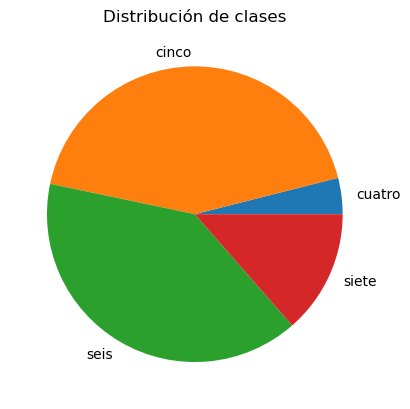

In [6]:
distribucion = datos.groupby('quality').size()
plt.pie(distribucion, labels = ['cuatro','cinco','seis', 'siete'])
plt.title('Distribución de clases')
plt.show()

## **2. SEPARACIÓN DE DATOS PARA TRAINING Y TESTING**

In [7]:
# Sparación de datos en entrada y salida
X = datos.drop(['quality'], axis=1)
y = datos['quality']
# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.30, random_state=5)

# **3. ENTRENAMIENTO Y TEST KNN**

In [8]:
# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors = 1)
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
print('Exactitud de K-NN, k=1, :', Exactitud)

Exactitud de K-NN, k=1, : 0.6171548117154811


## Matriz de confusión y exactitud

In [9]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[  2   7   7   3]
 [  3 152  40   9]
 [  8  51 112  17]
 [  0   9  29  29]]


<Axes: >

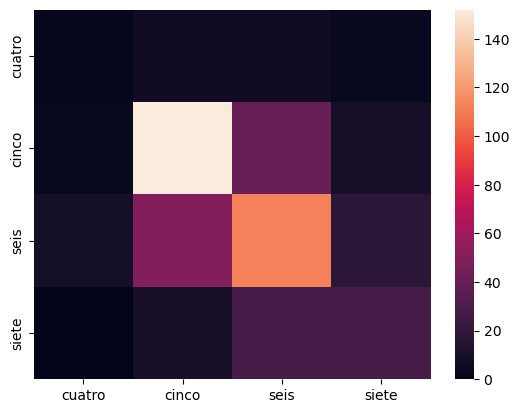

In [10]:
categorias = ['cuatro', 'cinco', 'seis', 'siete']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

In [11]:
from sklearn.metrics import accuracy_score
# Calculo de acurracy (exactitud)
accuracy = accuracy_score(y_test, pred)
print('Exactitud: ',accuracy)

Exactitud:  0.6171548117154811


# **4. PREDICCIÓN DE NUEVOS CASOS**

In [12]:
# Nuevo valor
nuevo = np.array([[9.8, 0.46, 0.48, 1.4, 0.075, 3.0, 6.0, 0.99, 3.13, 0.63, 10.4]])

In [13]:
y_pred = Modelo.predict(nuevo)
print( f'La prediccion del nuevo caso es {y_pred[0]}')

La prediccion del nuevo caso es 6


# Conclusión
Se entrenenó el dataset de calidad de vino (winequality.csv), llengandose a una exactitud de 61.71% con los datos de semilla random_set = 5 y k = 1 (vecinos mas cercanos).
El porcentaje de 61.71% es muy bajo esto debido a la complejidad del dataset